In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **1. Data Loading**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pandas as pd

train_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

print(train_data.head())

  last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no  


In [4]:
print(train_data.shape) 
print(test_data.shape)

(39211, 16)
(10000, 15)


# **2. Exploratory Data Analysis**

## 2.1 Defining and analyzing the Feature Types
### 2.1.1 Stats for each Features

In [5]:
train_data.columns # gives the features of the dataset

Index(['last contact date', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target'],
      dtype='object')

In [6]:
train_data.describe() # calculates statistics of the features in the dataset

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


### 2.1.2 Categorizing Numerical and Categorial Features

In [7]:
numeric_columns = train_data.select_dtypes(include=['number'])
object_columns = train_data.select_dtypes(exclude=['number'])

print(f'{numeric_columns.columns}\n')
print(object_columns.columns)

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Index(['last contact date', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'poutcome', 'target'],
      dtype='object')


### 2.1.3 Finding Null and Unique Values

In [8]:
train_data.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

In [9]:
# Display unique values for each column
for column in train_data.columns:
    print(f"Unique values in '{column}':")
    print(train_data[column].unique())
    print("\n")

Unique values in 'last contact date':
['2009-04-17' '2009-10-11' '2010-11-20' ... '2009-07-05' '2008-02-25'
 '2010-04-12']


Unique values in 'age':
[26 52 44 33 31 25 46 37 38 32 28 34 86 42 58 39 35 47 45 48 30 50 56 54
 40 53 41 51 27 29 57 63 36 43 19 55 49 23 83 60 22 80 76 59 24 93 71 89
 64 68 85 79 62 69 20 90 66 87 72 88 67 70 77 91 78 61 65 73 74 84 82 92
 81 18 21 75 94 95]


Unique values in 'job':
['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]


Unique values in 'marital':
['married' 'single' 'divorced']


Unique values in 'education':
['secondary' 'tertiary' 'primary' nan]


Unique values in 'default':
['no' 'yes']


Unique values in 'balance':
[  647   553  1397 ...  4307  6187 38594]


Unique values in 'housing':
['yes' 'no']


Unique values in 'loan':
['no' 'yes']


Unique values in 'contact':
['cellular' 'telephone' nan]


Unique values in 'duration':
[ 357  160  326 ... 3

In [10]:
object_columns.nunique()

last contact date    1013
job                    11
marital                 3
education               3
default                 2
housing                 2
loan                    2
contact                 2
poutcome                3
target                  2
dtype: int64

## 2.2 Visualisation Data
### 2.2.1 Correlation Map Between Numerical Features

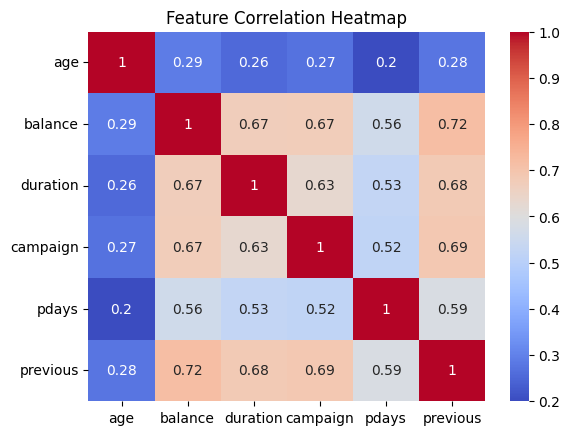

In [11]:
# Visualize correlations between numerical features
corr = numeric_columns.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### 2.2.2 Visulising Distribution of Numerical Features
#### Using Bar Charts

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


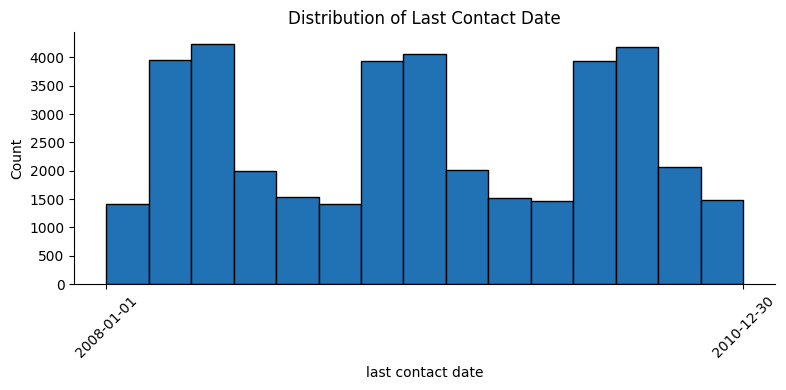

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


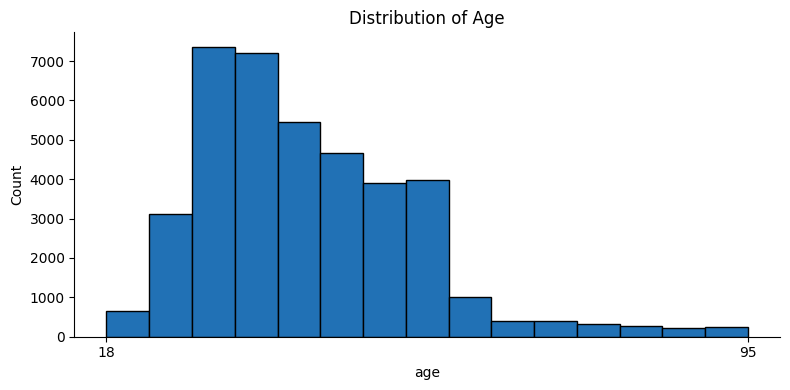

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


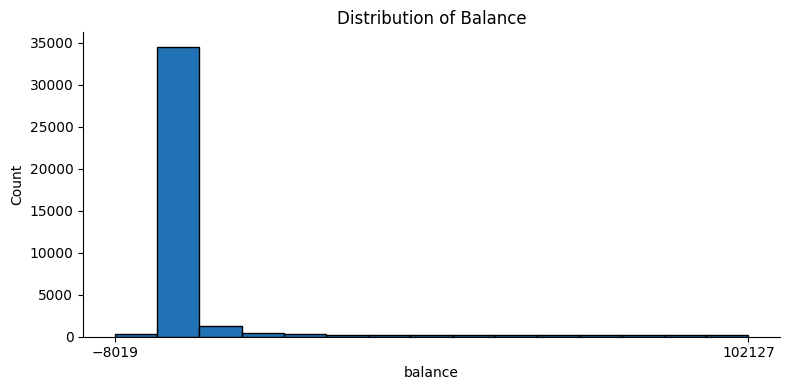

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


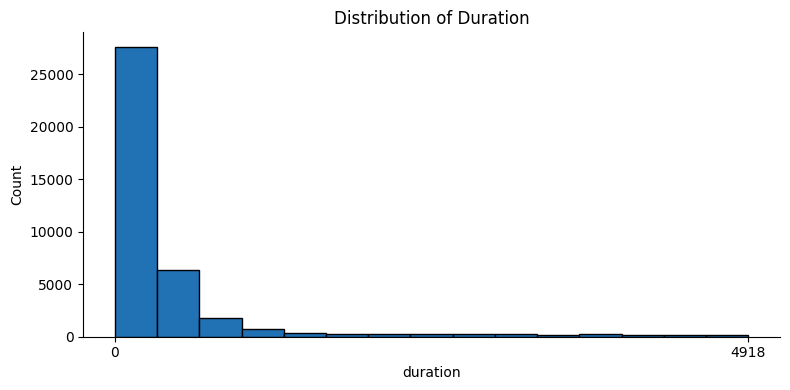

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


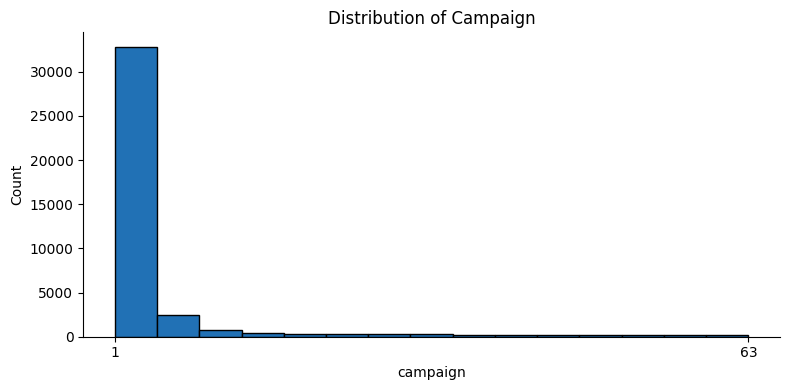

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


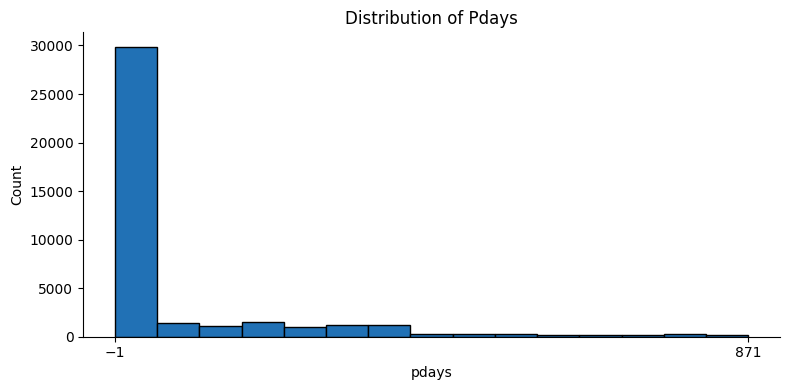

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


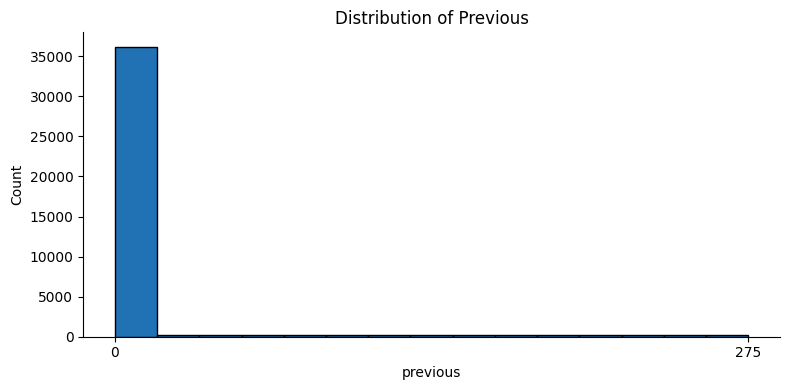

In [12]:
# Numerical columns

num_cols = ['last contact date', 'age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    
    if col == 'last contact date':
        # Convert string dates to datetime if not already
        if train_data[col].dtype == 'O':  # Object dtype indicates strings
            date_series = pd.to_datetime(train_data[col])
        else:
            date_series = train_data[col]
            
        # Create histogram for dates
        sns.histplot(
            data=date_series,
            bins=15,
            color='#2171b5',
            alpha=1
        )
        
        # Get min and max dates
        min_date = date_series.min()
        max_date = date_series.max()
        
        # Format dates for display
        date_format = '%Y-%m-%d'
        min_str = min_date.strftime(date_format)
        max_str = max_date.strftime(date_format)
        
        # Set x-axis ticks to show only min and max dates
        plt.xticks([min_date, max_date], [min_str, max_str], rotation=45)
        
    else:
        # Regular numeric columns
        sns.histplot(
            data=train_data,
            x=col,
            bins=15,
            color='#2171b5',
            alpha=1
        )
        
        # Get min and max values for numeric columns
        min_val = train_data[col].min()
        max_val = train_data[col].max()
        
        # Set x-axis ticks to show only min and max values
        plt.xticks([min_val, max_val])
        plt.xlim(min_val - (max_val - min_val)*0.05, max_val + (max_val - min_val)*0.05)
    
    # Get the current axis
    ax = plt.gca()
    
    # Remove gridlines
    ax.grid(False)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Title and labels
    plt.title(f'Distribution of {col.title()}')
    plt.ylabel('Count')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

### 2.2.3 Visualisation of Categorical Features
#### Using Bar Charts


Value Counts and Percentages for job:
                Count  Percentage
job                             
blue-collar     7776   19.831170
management      7462   19.030374
technician      6078   15.500752
admin.          4116   10.497054
services        3325    8.479763
self-employed   1862    4.748667
retired         1824    4.651756
entrepreneur    1805    4.603300
unemployed      1685    4.297264
housemaid       1656    4.223305
student         1393    3.552575


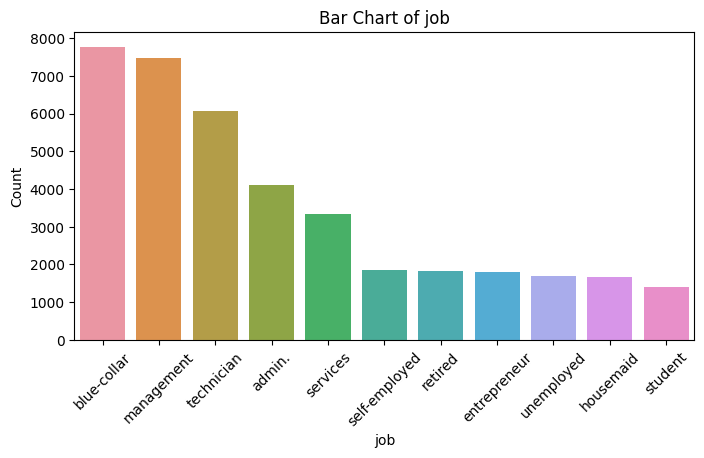


Value Counts and Percentages for marital:
           Count  Percentage
marital                    
married   22691   57.868965
single    11250   28.690929
divorced   5270   13.440106


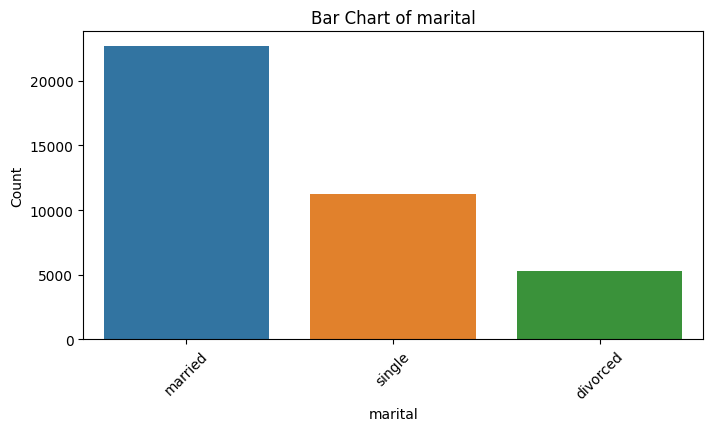


Value Counts and Percentages for education:
            Count  Percentage
education                   
secondary  19584   49.945168
tertiary   11615   29.621790
primary     6545   16.691745


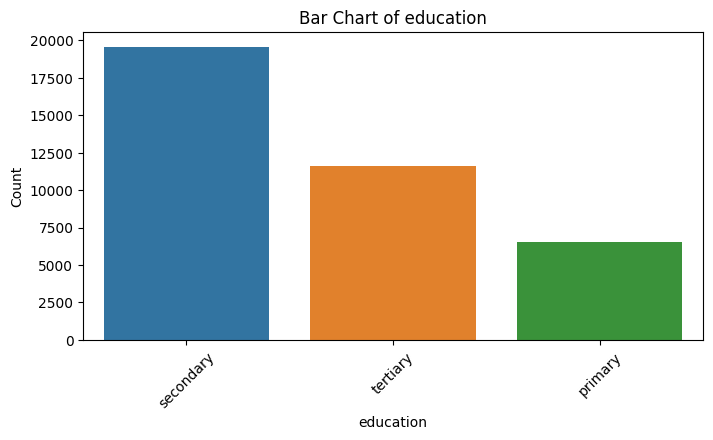


Value Counts and Percentages for contact:
            Count  Percentage
contact                     
cellular   25030   63.834128
telephone   3845    9.805922


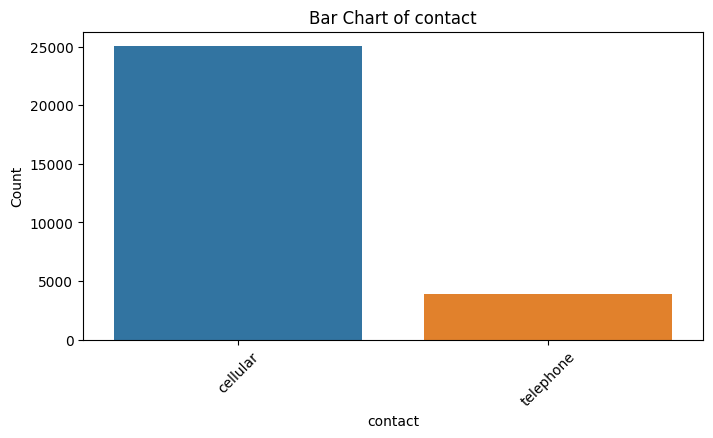


Value Counts and Percentages for poutcome:
           Count  Percentage
poutcome                   
failure    4949   12.621458
other      2560    6.528780
success    2251    5.740736


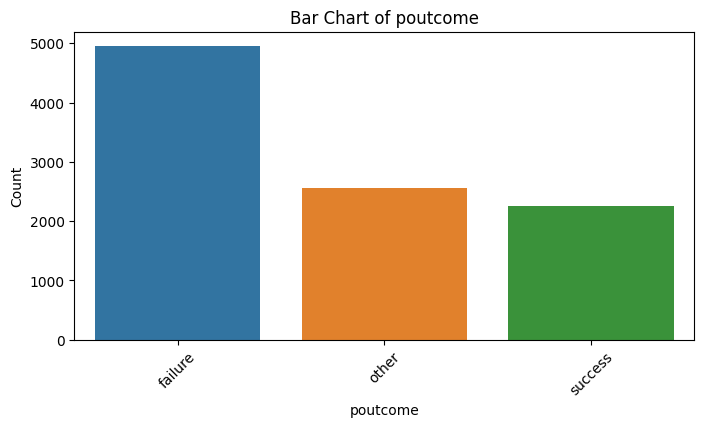

In [13]:
# Value counts with percentage for categorical columns
categorical_cols = ['job', 'marital', 'education', 'contact', 'poutcome']
for col in categorical_cols:
    value_counts = train_data[col].value_counts()
    percentages = value_counts / len(train_data) * 100
    value_counts_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})
    print(f"\nValue Counts and Percentages for {col}:\n", value_counts_df)
    
    # Plot the bar chart for categorical columns
    plt.figure(figsize=(8, 4))
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Bar Chart of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### 2.2.4 Visualisation of Binary (Yes or No) Features
#### Using Pie Charts

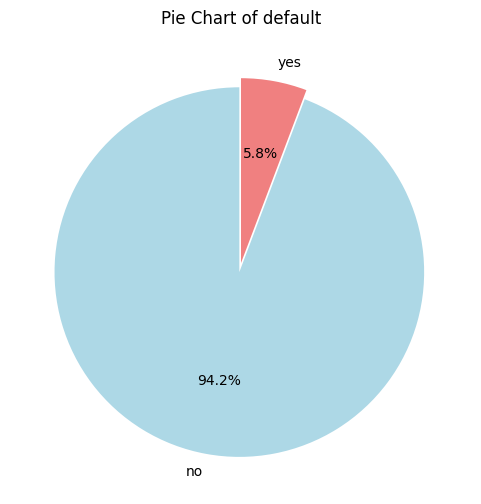

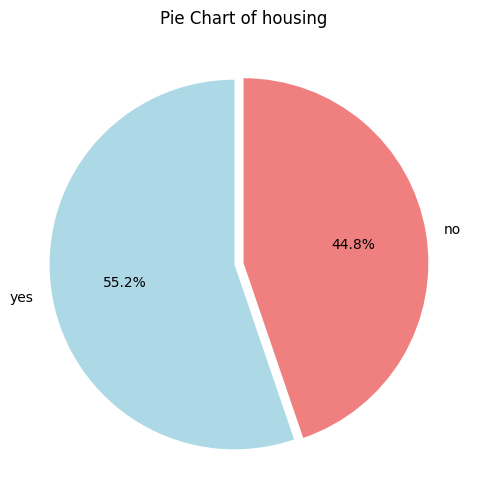

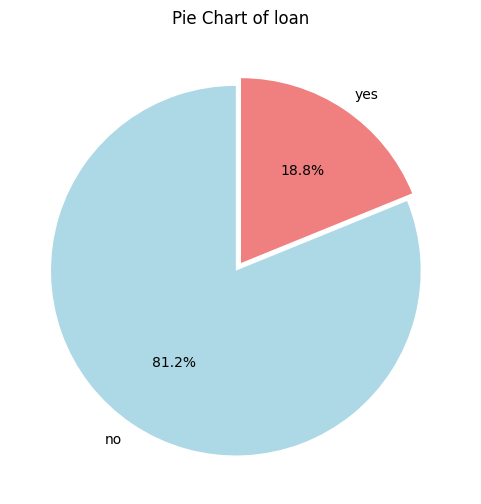

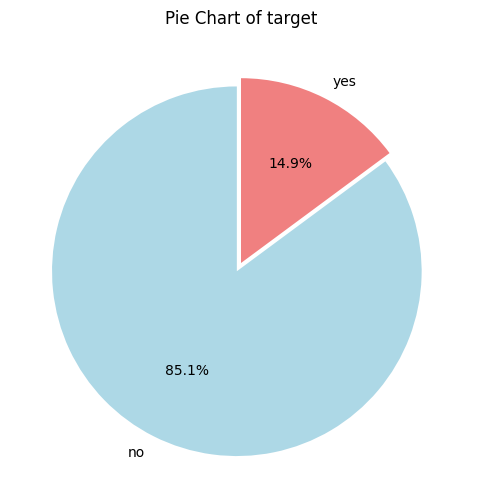

In [14]:
pie_cols = ['default', 'housing', 'loan', 'target']
for col in pie_cols:
    plt.figure(figsize=(6, 6))
    train_data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'], explode=[0.05, 0])
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')  # Hide y-label for better visual
    plt.show()

## 2.3 Data Pre Processing and Missing Values Imputation

### 2.3.1 Feature Engineering
#### Separating Date to Year, Month and Day

In [15]:
train_data['last contact date'] = pd.to_datetime(train_data['last contact date'])

train_data['contact_year'] = train_data['last contact date'].dt.year
train_data['contact_month'] = train_data['last contact date'].dt.month
train_data['contact_day'] = train_data['last contact date'].dt.day

train_data.drop(columns=['last contact date'], inplace=True)

In [16]:
test_data['last contact date'] = pd.to_datetime(test_data['last contact date'])

test_data['contact_year'] = test_data['last contact date'].dt.year
test_data['contact_month'] = test_data['last contact date'].dt.month
test_data['contact_day'] = test_data['last contact date'].dt.day

test_data.drop(columns=['last contact date'], inplace=True)

#### Preparing the Target Feature
#### Mapping with Yes: 1 and No: 0

In [17]:
X = train_data.drop(columns=['target'])
y = train_data['target'].map({'yes': 1, 'no': 0})

In [18]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'contact_year', 'contact_month', 'contact_day'],
      dtype='object')

### 2.3.2 Data Preprcessing with Pipelines


* #### Scaling Numerical Features* #### Encoding Categorical Features

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

transformers = [
    ('contact_year', 'passthrough', ['contact_year']),
    ('contact_month', 'passthrough', ['contact_month']),
    ('contact_day', 'passthrough', ['contact_day']),
    ('age', StandardScaler(), ['age']),
    ('job', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), ['job']),
    ('marital', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['marital']),
    ('education', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('ordinal', OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary']]))
    ]), ['education']),
    ('default', OrdinalEncoder(categories=[['no', 'yes']]), ['default']),
    ('balance', MinMaxScaler(), ['balance']),
    ('housing', OrdinalEncoder(categories=[['no', 'yes']]), ['housing']),
    ('loan', OrdinalEncoder(categories=[['no', 'yes']]), ['loan']),
    ('contact', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), ['contact']),
    ('duration', MinMaxScaler(), ['duration']),
    ('campaign', MinMaxScaler(), ['campaign']),
    ('pdays', MinMaxScaler(), ['pdays']),
    ('previous', MinMaxScaler(), ['previous']),
    ('poutcome', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), ['poutcome'])
]

preprocessor = ColumnTransformer(transformers=transformers, verbose_feature_names_out=False).set_output(transform="pandas")

X_preprocessed = preprocessor.fit_transform(X)

print(X_preprocessed.shape)
print(X_preprocessed.head())

(39211, 34)
   contact_year  contact_month  contact_day       age  job_admin.  \
0          2009              4           17 -1.268393         0.0   
1          2009             10           11  0.777371         0.0   
2          2010             11           20  0.147905         0.0   
3          2009              9            1 -0.717610         1.0   
4          2008              1           29 -0.874977         0.0   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0              1.0               0.0            0.0             0.0   
1              0.0               0.0            0.0             0.0   
2              1.0               0.0            0.0             0.0   
3              0.0               0.0            0.0             0.0   
4              0.0               1.0            0.0             0.0   

   job_retired  ...  contact_telephone  contact_unknown  duration  campaign  \
0          0.0  ...                0.0              0.0  0.072590  

#### Checking for Null Values

In [20]:
null_values = X_preprocessed.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 contact_year         0
contact_month        0
contact_day          0
age                  0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
marital_divorced     0
marital_married      0
marital_single       0
education            0
default              0
balance              0
housing              0
loan                 0
contact_cellular     0
contact_telephone    0
contact_unknown      0
duration             0
campaign             0
pdays                0
previous             0
poutcome_failure     0
poutcome_other       0
poutcome_success     0
poutcome_unknown     0
dtype: int64


# **3. Models Training, Validation and Testing**
## 3.1 Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(31368, 34)
(31368,)
(7843, 34)
(7843,)


## 3.2 Basline Model (Logistic Regression)
### 3.2.1 Model Prediction and Validation

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Initialize and train a logistic regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_model.predict(X_val)
baseline_f1 = f1_score(y_val, y_pred, average='macro')
print(f'Baseline F1 Score (Logistic Regression): {baseline_f1}')

Baseline F1 Score (Logistic Regression): 0.6228612836700493


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.2.2 Testing the Model and Submission

In [23]:
X_test_preprocessed = preprocessor.fit_transform(test_data)

predictions = log_model.predict(X_test_preprocessed)

submission_df = pd.DataFrame({
    'id': test_data.index, 
    'target': predictions
})

# Convert target to 'yes' or 'no'
submission_df['target'] = submission_df['target'].map({1: 'yes', 0: 'no'})  # Assuming 1 is 'yes' and 0 is 'no'

# Save to CSV
submission_df.to_csv('/kaggle/working/submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv


In [24]:
submission_df['target'].value_counts()

target
no     9436
yes     564
Name: count, dtype: int64

## 3.3 Hyperparameter Tuning and Gradient Descent 
### 3.3.1 Tuning Hyperparameters and Prediction with Logistic Regression (Model 1)
### **Best Model Rank 2** - Logistic Regression with Hyperparameters Tuned

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(class_weight='balanced',random_state=42))
])

# parameter grid for hyperparameter tuning
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'log_reg__penalty': ['l1', 'l2', 'elasticnet'],
    'log_reg__solver': ['liblinear', 'saga'],
    'log_reg__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_val)
improved_f1 = f1_score(y_val, y_pred, average='macro')
print(f'Improved F1 Score (Logistic Regression): {improved_f1}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Improved F1 Score (Logistic Regression): 0.7136576001228656


In [26]:
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'log_reg__C': 0.01, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'l1', 'log_reg__solver': 'saga'}


### 3.3.2 Testing and Submission of Model Prediction

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score

X_test_preprocessed = preprocessor.fit_transform(test_data)

predictions = best_model.predict(X_test_preprocessed)

submission_df = pd.DataFrame({
    'id': test_data.index,  
    'target': predictions
})

# Convert target to 'yes' or 'no'
submission_df['target'] = submission_df['target'].map({1: 'yes', 0: 'no'})  # Assuming 1 is 'yes' and 0 is 'no'

# Save to CSV
submission_df.to_csv('submission_2.csv', index=False)

print("Submission file created: submission_2.csv")


Submission file created: submission_2.csv


#### Test Validation Score: 0.72726

In [28]:
submission_df['target'].value_counts()

target
no     7620
yes    2380
Name: count, dtype: int64

## 3.4 Dimensionality Reduction and Feature Selection
### 3.4.1 PCA for Model Prediction

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

pca = PCA(n_components=24)  # Adjust n_components based on explained variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Check explained variance ratio
print(pca.explained_variance_ratio_)

[0.16341178 0.07019936 0.05932552 0.05187034 0.04189834 0.0391188
 0.03663255 0.03383021 0.03308643 0.03244264 0.03162329 0.03109862
 0.03104638 0.03082578 0.02983503 0.02933248 0.02827802 0.02747657
 0.02616895 0.02532874 0.02377759 0.02150049 0.01969799 0.01763405]


In [30]:
# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(cumulative_variance)

[0.16341178 0.23361113 0.29293666 0.344807   0.38670534 0.42582414
 0.46245669 0.4962869  0.52937333 0.56181598 0.59343927 0.62453789
 0.65558427 0.68641005 0.71624508 0.74557756 0.77385557 0.80133215
 0.82750109 0.85282983 0.87660743 0.89810792 0.91780591 0.93543996]


In [31]:
pca = PCA(n_components=24)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

### Naive Bayes Model with PCA (Model 2)

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)
y_pred_nb = nb_model.predict(X_val_pca)

f1_nb = f1_score(y_val, y_pred_nb, average='macro')
print(f'F1 Score (Naive Bayes): {f1_nb}')

F1 Score (Naive Bayes): 0.6298416371354445


### KNN with PCA (Model 3)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_val_pca)

f1_knn = f1_score(y_val, y_pred_knn, average='macro')
print(f'F1 Score (k-NN): {f1_knn}')

F1 Score (k-NN): 0.6471915662691227


### SVM with PCA (Model 4)

In [34]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, random_state=42)  # Try different kernels like 'linear', 'poly'
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_val_pca)

f1_svm = f1_score(y_val, y_pred_svm, average='macro')
print(f'F1 Score (SVM): {f1_svm}')

F1 Score (SVM): 0.638265225915176


### 3.4.2 Feature Selection for Model Prediction

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Use a Random Forest to determine feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Select important features
selector = SelectFromModel(rf, prefit=True)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['contact_month', 'contact_day', 'age', 'balance', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome_success'],
      dtype='object')


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### Naive Bayes with Feature Selection (Model 5)

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

nb_model = GaussianNB()
nb_model.fit(X_train_selected, y_train)
y_pred_nb = nb_model.predict(X_val_selected)

f1_nb = f1_score(y_val, y_pred_nb, average='macro')
print(f'F1 Score (Naive Bayes): {f1_nb}')

F1 Score (Naive Bayes): 0.6890166534496431


### KNN with Feature Selection (Model 6)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train_selected, y_train)
y_pred_knn = knn_model.predict(X_val_selected)

f1_knn = f1_score(y_val, y_pred_knn, average='macro')
print(f'F1 Score (k-NN): {f1_knn}')


F1 Score (k-NN): 0.6639464061069719


### SVM with Feature Selection (Model 7)

In [38]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1, random_state=42)  # Try different kernels like 'linear', 'poly'
svm_model.fit(X_train_selected, y_train)
y_pred_svm = svm_model.predict(X_val_selected)

f1_svm = f1_score(y_val, y_pred_svm, average='macro')
print(f'F1 Score (SVM): {f1_svm}')

F1 Score (SVM): 0.6127087819606903


## 3.5 Ensemble (Bagging, Boosting and Stacking)

In [39]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

### 3.5.1 Bagging with Random Forest (Model 8)
### **Best Model Rank 3** - Bagging with Random Forest

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest
bagging_model = RandomForestClassifier(random_state=42)
bagging_model.fit(X_train_resampled, y_train_resampled)
y_pred = bagging_model.predict(X_val)

f1 = f1_score(y_val, y_pred, average='macro')
print(f'F1 Score (Random Forest with SMOTE): {f1}')

F1 Score (Random Forest with SMOTE): 0.7327105988784584


#### Model Testing and Submission

In [41]:
X_test_preprocessed = preprocessor.fit_transform(test_data)

predictions = bagging_model.predict(X_test_preprocessed)

submission_df = pd.DataFrame({
    'id': test_data.index,  
    'target': predictions
})

# Convert target to 'yes' or 'no'
submission_df['target'] = submission_df['target'].map({1: 'yes', 0: 'no'})  # Assuming 1 is 'yes' and 0 is 'no'

# Save to CSV
submission_df.to_csv('submission_3.csv', index=False)

print("Submission file created: submission_3.csv")

Submission file created: submission_3.csv


#### Test Validation Score: 0.71500

In [42]:
submission_df['target'].value_counts()

target
no     8782
yes    1218
Name: count, dtype: int64

### 3.5.2 Boosting with XGBoost (Model 9)
### **Best Model Rank 1** - Boosting with XGBoost

In [43]:
# Boosting (e.g., XGBoost)
import xgboost as xgb
from sklearn.metrics import f1_score

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train XGBoost with class weight - scale_pos_weight
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')
print(f'F1 Score with scale_pos_weight: {f1}')

F1 Score with scale_pos_weight: 0.774452164852618


#### Model Testing and Submission

In [44]:
X_test_preprocessed = preprocessor.fit_transform(test_data)

predictions = xgb_model.predict(X_test_preprocessed)

submission_df = pd.DataFrame({
    'id': test_data.index,  
    'target': predictions
})

# Convert target to 'yes' or 'no'
submission_df['target'] = submission_df['target'].map({1: 'yes', 0: 'no'})  # Assuming 1 is 'yes' and 0 is 'no'

# Save to CSV
submission_df.to_csv('submission_1.csv', index=False)

print("Submission file created: submission_1.csv")

Submission file created: submission_1.csv


#### Test Validation Score: 0.75125

In [45]:
submission_df['target'].value_counts()

target
no     8171
yes    1829
Name: count, dtype: int64

### 3.5.3 Stacking with Logistic Regression and SVM (Model 10)

In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import f1_score, accuracy_score

stacking_model = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(solver='saga', max_iter=1000, tol=1e-4, random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=42)
)
stacking_model.fit(X_train, y_train)

y_pred_stacking = stacking_model.predict(X_val)
stacking_f1 = f1_score(y_val, y_pred_stacking, average='macro')
print(f'F1 Score (Stacking): {stacking_f1}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

F1 Score (Stacking): 0.6206670417164779


## 3.6 Multi Layer Perceptron
### 3.6.1 Multi Layer Perceptron (MLP) - Model 11

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_val)
mlp_f1 = f1_score(y_val, y_pred_mlp, average='macro')
print(f'F1 Score (MLP): {mlp_f1}')

F1 Score (MLP): 0.6666533861267759


# **4. Results and Insights**

## 4.1 Insights Obtained from Dataset

### 4.1.1 Important Findings from Dataset

* Identified a significant **class imbalance** in the `target` variable, with **15% labeled as 'yes'** and **85% as 'no'**.

* Found columns such as `job`, `education`, `contact`, and `poutcome` containing missing or `NaN`values.
  
* The `date` column required transformation into `numerical` values (that is, `year`, `month`, and `day`) for preprocessing.
  
* Observed that the `job` column had the **highest cardinality** compared to other `categorical` columns.

* **Visualized** the dataset and found these findings to be true.


### 4.1.2 Ideas Derived from Findings

* Applied **One-Hot Encoding** for `categorical` variables with multiple unique values.

* Used **Ordinal Encoding** for `binary` variables (e.g., 'yes' or 'no') to reduce dimensionality and assign meaningful order (e.g., yes=1, no=0).

* For columns with **significant missing data**, imputed with the `most frequent` value.

* For others, replaced `NaN` values with `unknown` to preserve information. 

* Applied **StandardScale** to `continuous` variables like `age`.

* Used **MinMaxScaler** for `discrete` variables to bring values within a defined range, especially since some had **negative values** or **exceeded 1000**.

* The preprocessing resulted in **34 features**, all with **no missing values**.

* Managed the `target` imbalance using techniques such as **SMOTE** and **class weights** during model training to improve model performance.

## 4.2 Insights on the Best 3 Model Performances

### 4.2.1 Comparsion of Best 3 Models

#### Rank 1: XGBoost

* **Validation Score (Kaggle):** 75.125%,
* **F1 Score:** Approx 77%
* Outperformed others by handling **class imbalance** using `scale_pos_weight` and capturing complex patterns.
* It is **Computationally expensive** than the other two models.

#### Rank 2: Logistic Regression (Tuned)

* **Validation Score (Kaggle):** 72.726%
* **F1 Score:** Approx 71.3%
* Simple and efficient, improved with **hyperparameter tuning**.
* Struggled with non-linear patterns and **class imbalance**.

#### Rank 3: Random Forest

* **Validation Score (Kaggle):** 71.50%
* **F1 Score:** Approx 73%
* Robust and **less prone to overfitting**, performed well.
* Required more effort to handle **imbalance**.



### 4.2.2 Insights from 3 Model Results

#### 1. XGBoost:
* Managed class imbalance effectively, making it more capable in handling imbalanced data distributions.
  
#### 2. Logistic Regression:
* Hyperparameter tuning made this simple model perform surprisingly well, achieving a high F1 score and fast predictions.
  

#### 3. Random Forest:
* While it performed similarly to XGBoost, its handling of class imbalance was not as robust.
* This led to slightly reduced effectiveness, though it still provided strong predictions and good performance.

# **5. Summary or Conclusion:**

In this classification task, its aimed to predict a binary target variable from a dataset with significant class imbalance (85% "no" and 15% "yes"). After performing thorough data preprocessing, including handling missing values, encoding categorical variables, and scaling numerical features, try experimented with different machine learning models.

#### The top-performing models were:

1. **XGBoost with** `scale_pos_weight` *(75.125% Score)*

2. **Logistic Regression with** `Hyperparameter Tuned` **and** `class_weights` *(72.726% Score)*

3. **Random Forest with** `SMOTE` *(71.500% Score)*